<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/auto-arima-sbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’

# New Section

In [2]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching package: ‘timeDate’


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAn

In [3]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-21"

In [5]:
# Download data from Yahoo Finance
symbol<-getSymbols("HDFC.NS",from=start_date,auto.assign=FALSE)



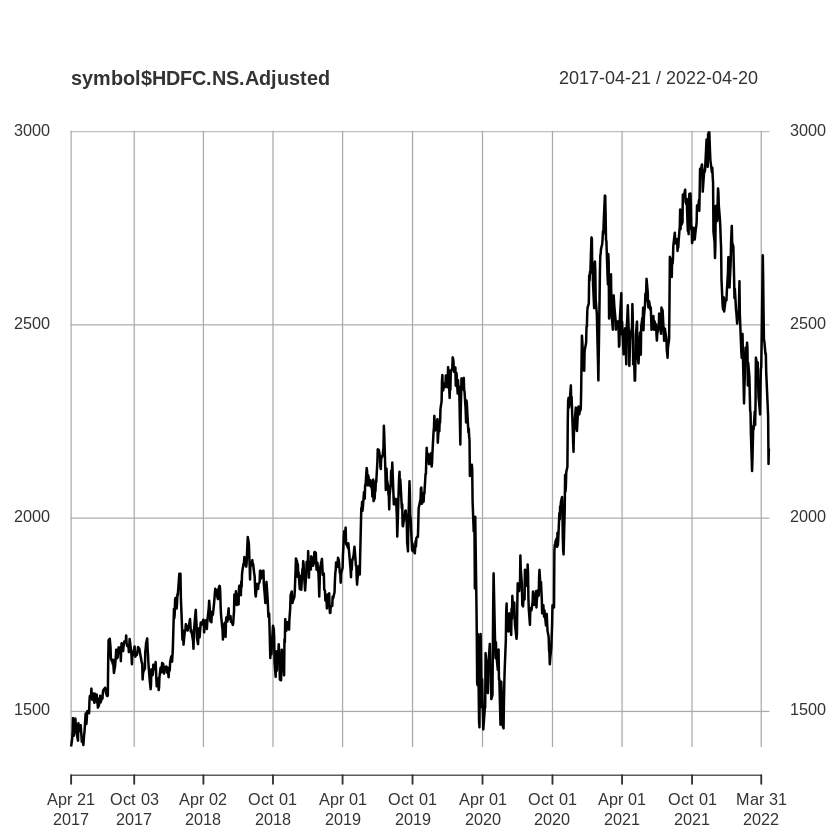

In [6]:
plot(symbol$HDFC.NS.Adjusted)

In [7]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$HDFC.NS.Volume>0,]

     Index             HDFC.NS.Open   HDFC.NS.High   HDFC.NS.Low  
 Min.   :2017-04-21   Min.   :1476   Min.   :1527   Min.   :1473  
 1st Qu.:2018-07-16   1st Qu.:1796   1st Qu.:1820   1st Qu.:1773  
 Median :2019-10-25   Median :1980   Median :1996   Median :1960  
 Mean   :2019-10-20   Mean   :2100   Mean   :2123   Mean   :2073  
 3rd Qu.:2021-01-18   3rd Qu.:2424   3rd Qu.:2448   3rd Qu.:2402  
 Max.   :2022-04-20   Max.   :3004   Max.   :3021   Max.   :2971  
 HDFC.NS.Close  HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   :1500   Min.   :  119832   Min.   :1409    
 1st Qu.:1793   1st Qu.: 2232370   1st Qu.:1721    
 Median :1978   Median : 3168128   Median :1895    
 Mean   :2098   Mean   : 3711379   Mean   :2039    
 3rd Qu.:2424   3rd Qu.: 4347639   3rd Qu.:2382    
 Max.   :3001   Max.   :34117717   Max.   :3001    

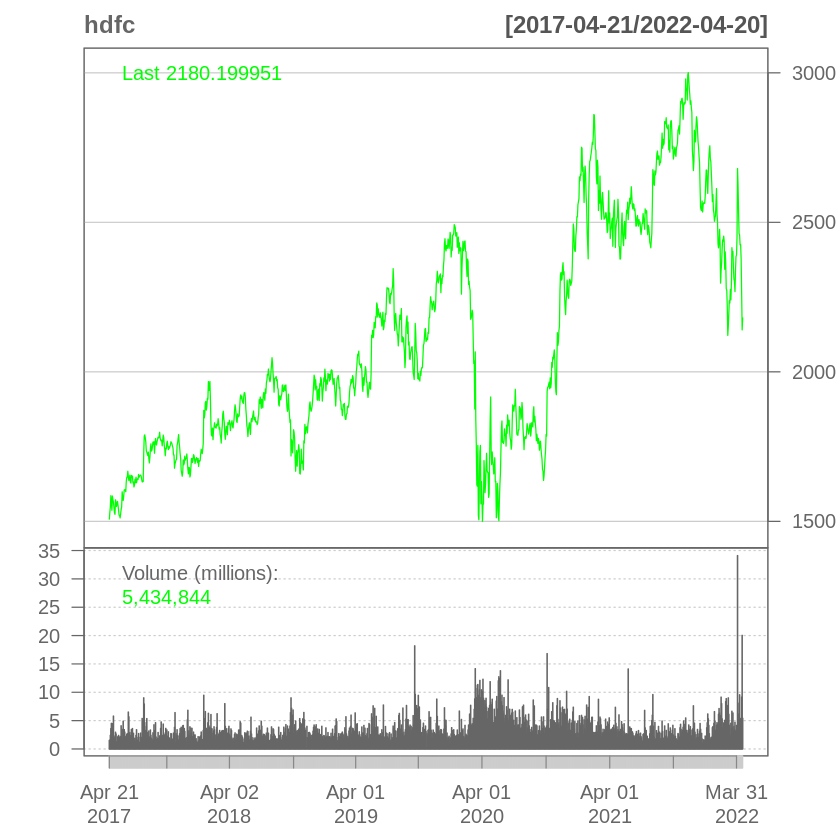

In [8]:
chartSeries(symbol,theme="white.mono",name="hdfc",type = 'line', up.col = "green",dn.col="red")

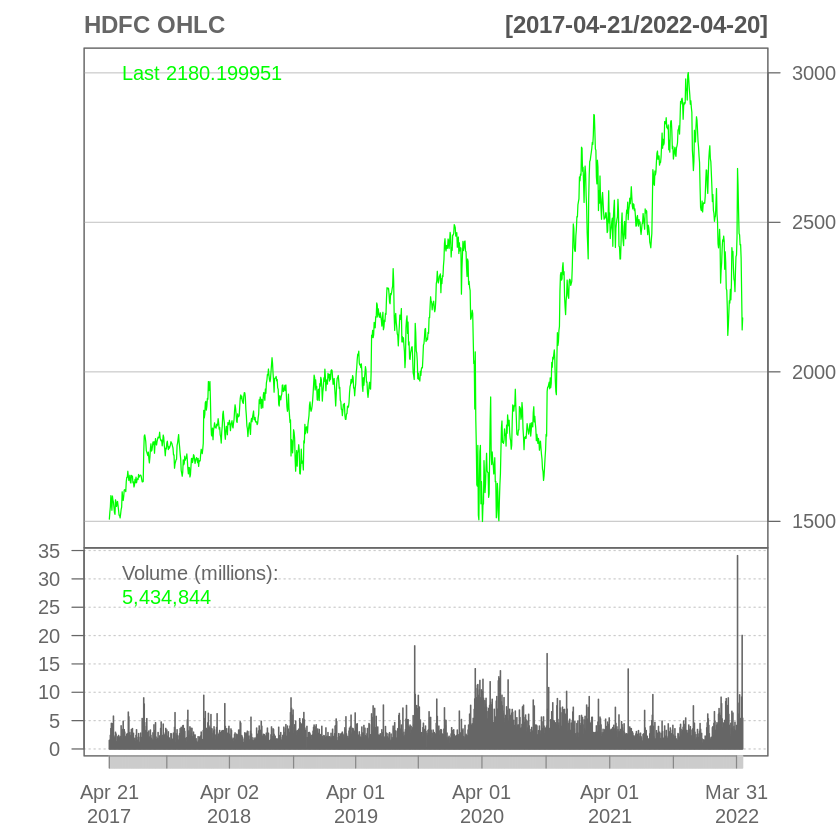

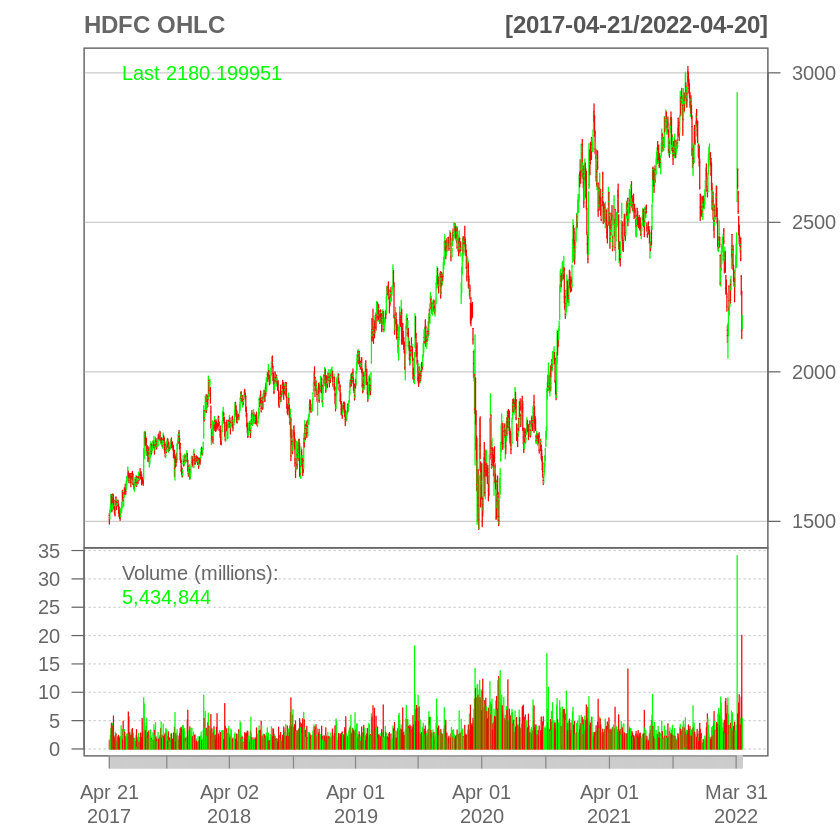

In [9]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="HDFC OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="HDFC OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="HDFC OHLC", up.col = "green",dn.col="red")

In [10]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$HDFC.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"hdfc_returns.csv",row.names=FALSE)

           HDFC.NS.Adjusted
2017-04-24       0.01530571
2017-04-25       0.01149695
2017-04-26       0.02399317
2017-04-27      -0.01237139
2017-04-28      -0.01891381
2017-05-02       0.03049651

In [11]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$HDFC.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 102.1275
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 21 21:19:34 2022 by user: 


In [12]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for HDFC
jarqueberaTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2701.3396
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 21 21:19:39 2022 by user: 


In [13]:
# Now we do other tests for same data for cross check
shapiroTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9295
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 21 21:19:44 2022 by user: 


In [14]:
# hdfc return are 0.1809 shows it to be normal again.
shapiroTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9145
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 21 21:19:48 2022 by user: 


In [15]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$HDFC.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$HDFC.NS.Adjusted
Dickey-Fuller = -2.3727, Lag order = 10, p-value = 0.4206
alternative hypothesis: stationary


In [16]:
adf.test(returns$HDFC.NS.Adjusted) 

Warning message in adf.test(returns$HDFC.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$HDFC.NS.Adjusted
Dickey-Fuller = -11.433, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [17]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-228.944  -18.646    0.423   19.357  226.310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    6.373e-05  5.433e-04   0.117    0.907
z.diff.lag 2.074e-02  2.851e-02   0.728    0.467

Residual standard error: 39.62 on 1231 degrees of freedom
Multiple R-squared:  0.0004443,	Adjusted R-squared:  -0.00118 
F-statistic: 0.2736 on 2 and 1231 DF,  p-value: 0.7607


Value of test-statistic is: 0.1173 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [18]:
summary(ur.df(returns$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.143201 -0.009418  0.000565  0.010033  0.097603 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.07011    0.04017 -26.637   <2e-16 ***
z.diff.lag  0.07353    0.02853   2.577   0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01976 on 1230 degrees of freedom
Multiple R-squared:  0.5011,	Adjusted R-squared:  0.5003 
F-statistic: 617.7 on 2 and 1230 DF,  p-value: < 2.2e-16


Value of test-statistic is: -26.6371 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [19]:
summary(ur.kpss(prices$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.69 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [20]:
summary(ur.kpss(returns$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.079 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


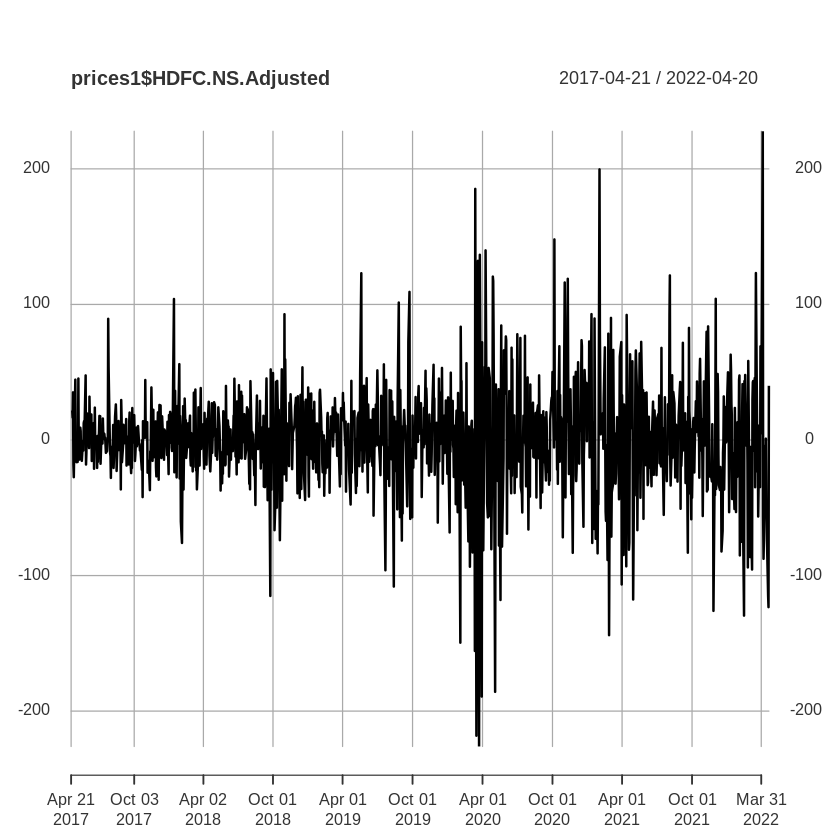

In [21]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices1 <- diff(prices)
plot (prices1$HDFC.NS.Adjusted)

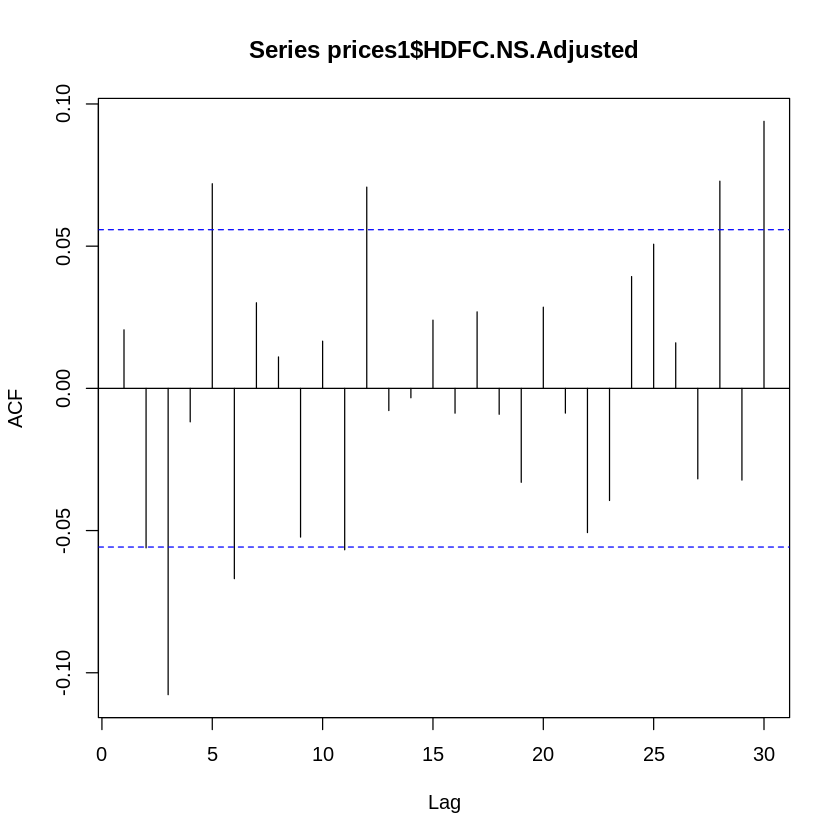

In [22]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices1<-na.omit(prices1)
acf(prices1$HDFC.NS.Adjusted)

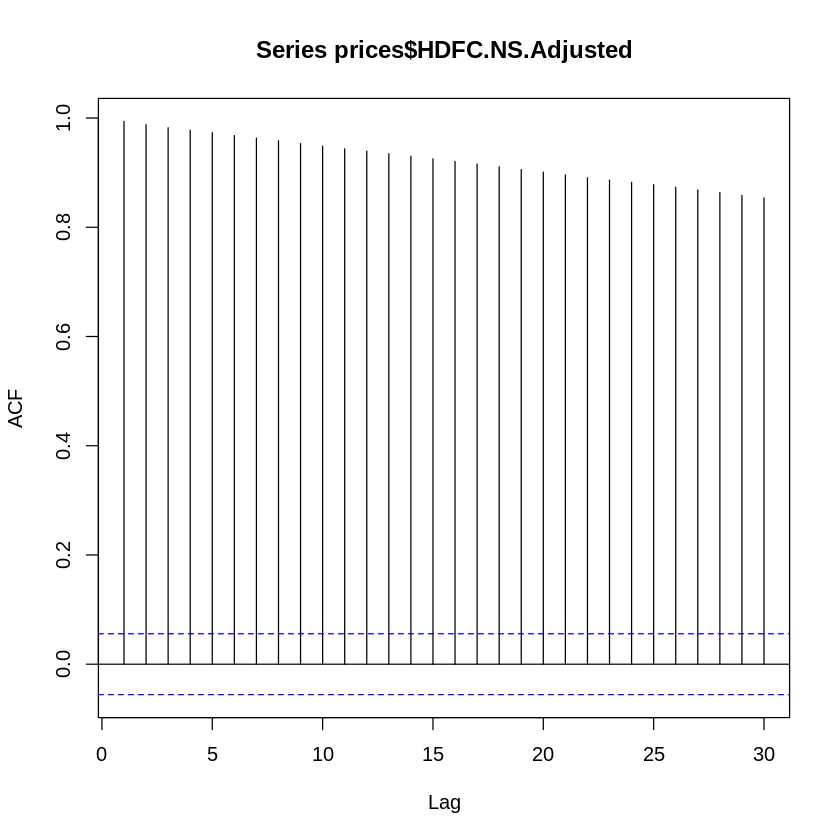

In [23]:
# on the otherhand if we compute ACF on data with trend
acf(prices$HDFC.NS.Adjusted)

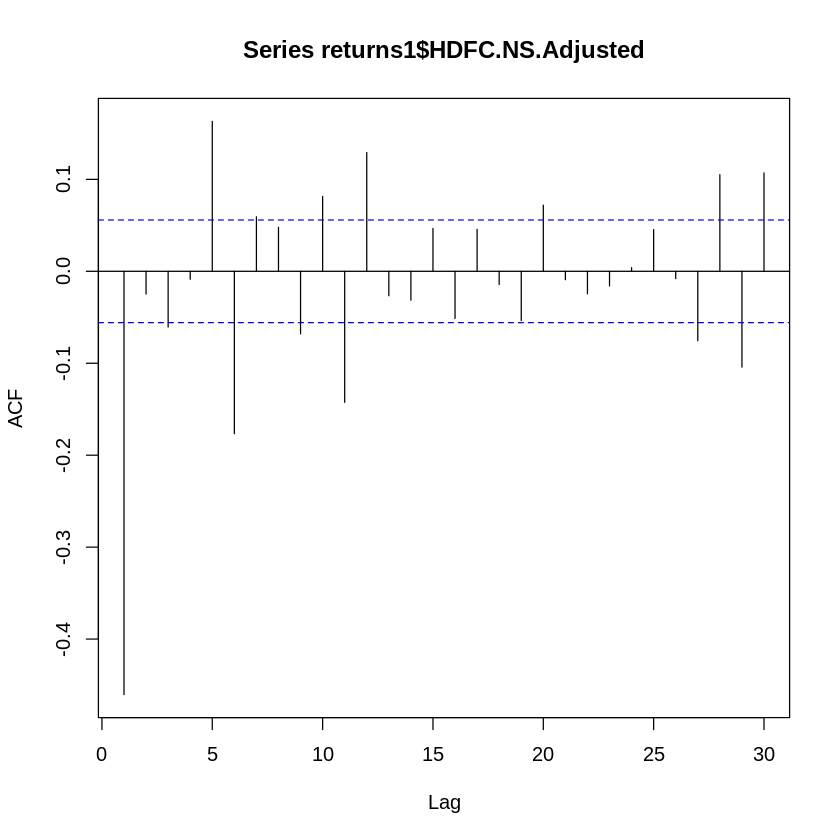

In [24]:
# similarly, finding acf for returns.
returns1 <- diff(returns)
returns1<-na.omit(returns1)
acf(returns1$HDFC.NS.Adjusted)

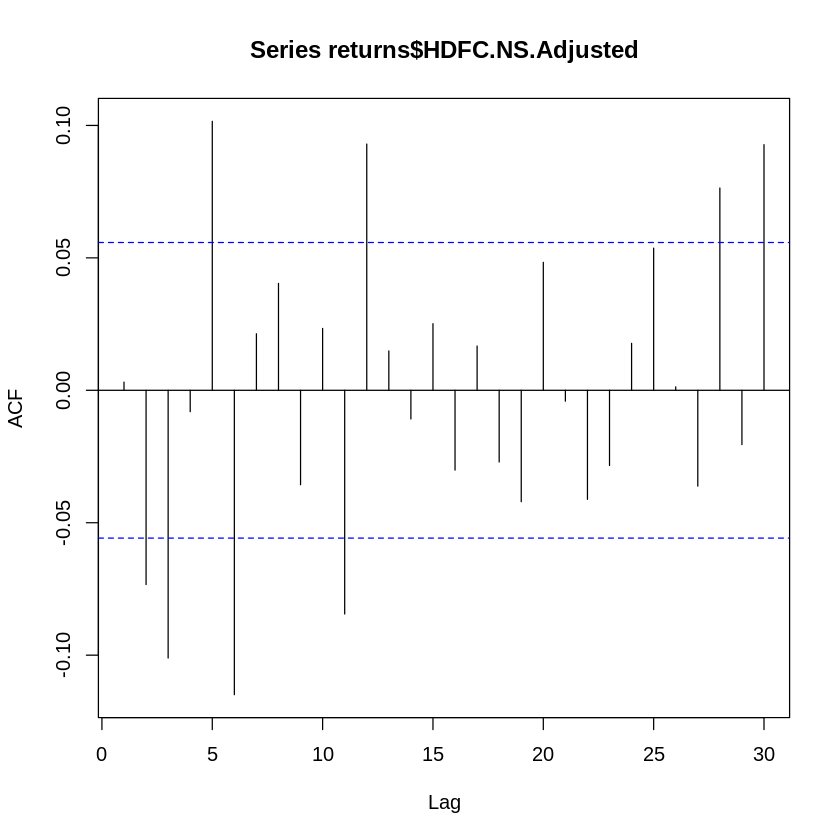

In [25]:
# on the otherhand if we compute ACF on data with trend
acf(returns$HDFC.NS.Adjusted)

In [26]:
# tests for auto-corelation
Box.test(prices1$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices1$HDFC.NS.Adjusted
X-squared = 25.382, df = 5, p-value = 0.0001175


In [27]:
# for returns
Box.test(returns1$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns1$HDFC.NS.Adjusted
X-squared = 300.48, df = 5, p-value < 2.2e-16


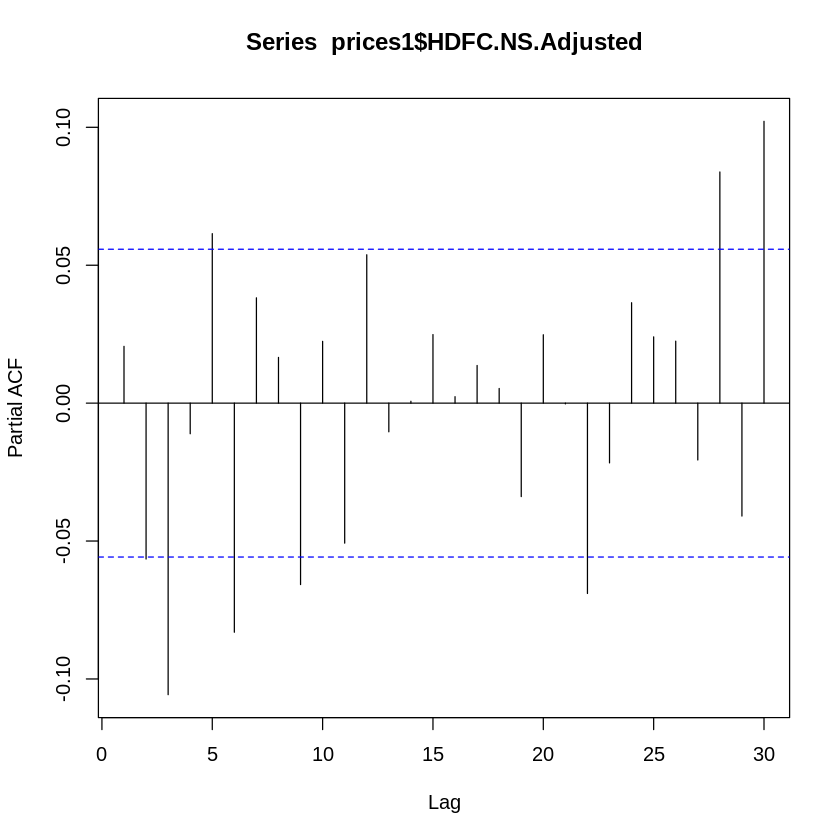

In [28]:
#PACF
pacf(prices1$HDFC.NS.Adjusted)

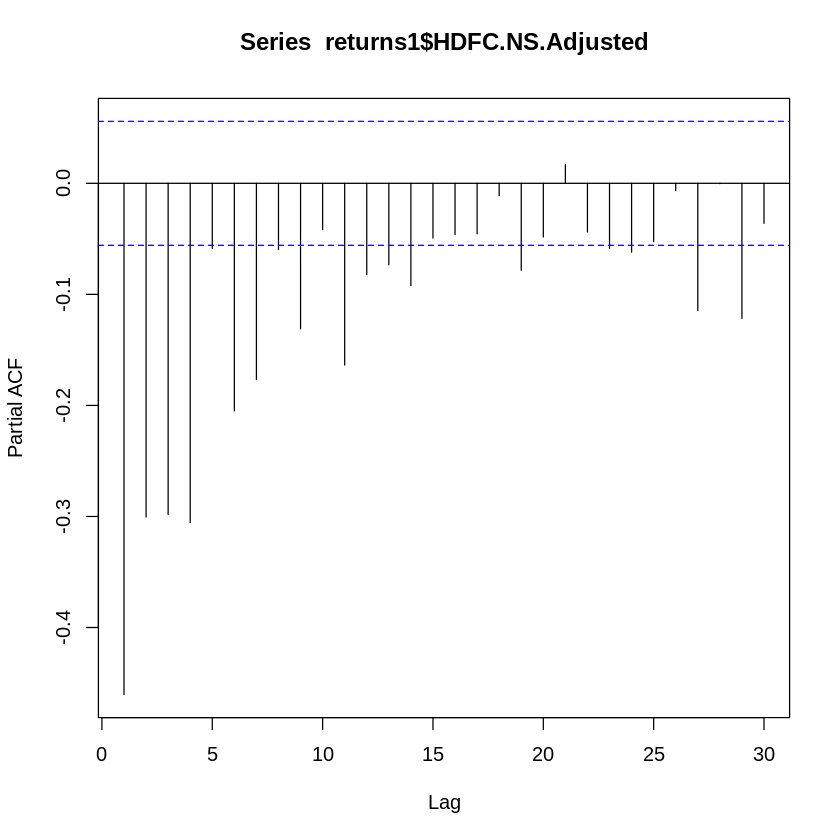

In [29]:
pacf(returns1$HDFC.NS.Adjusted)

In [31]:
basicStats(prices)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.235000e+03
NAs,0.000000e+00
Minimum,1.409288e+03
Maximum,3.000850e+03
1. Quartile,1.720592e+03
3. Quartile,2.382077e+03
Mean,2.038746e+03
Median,1.894654e+03
Sum,2.517852e+06


In [32]:
BoxCox.lambda(prices$HDFC.NS.Adjusted)

[1] 0.7639622

In [33]:
prices2<-prices
prices2$HDFC.NS.Adjusted<-forecast::BoxCox(prices$HDFC.NS.Adjusted, lambda = 0.763962242358797)
basicStats(prices2)

,HDFC.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,331.845106
Maximum,592.178375
1. Quartile,386.719708
3. Quartile,496.192996
Mean,438.953527
Median,416.364734
Sum,542107.605333


In [34]:
returns2<-returns
# to handle negative values in the returns
returns2<-exp(returns2)
returns2<-na.omit(returns2)
BoxCox.lambda(returns2$HDFC.NS.Adjusted)


[1] 1.999924

In [36]:
returns2$HDFC.NS.Adjusted<-forecast::BoxCox(returns$HDFC.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns2<-log(returns2) 
basicStats(returns2)

,HDFC.NS.Adjusted
,<dbl>
nobs,1234.000000
NAs,0.000000
Minimum,-0.510202
Maximum,-0.495312
1. Quartile,-0.500066
3. Quartile,-0.499968
Mean,-0.500022
Median,-0.500019
Sum,-617.027001


In [37]:
prices3<-prices
prices3<-as.data.frame(prices3)
x<-bestNormalize::boxcox(as.vector({prices3$HDFC.NS.Adjusted}))
basicStats(x$x.t)

,X..x.x.t
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,-2.153701
Maximum,1.876135
1. Quartile,-0.779625
3. Quartile,0.948656
Mean,0.000000
Median,-0.207974
Sum,0.000000


In [38]:
returns3<-bestNormalize::yeojohnson(x=returns$HDFC.NS.Adjusted)
basicStats(returns3$x.t)

,HDFC.NS.Adjusted
,<dbl>
nobs,1234.000000
NAs,0.000000
Minimum,-6.410111
Maximum,5.339752
1. Quartile,-0.525518
3. Quartile,0.479812
Mean,0.000000
Median,-0.021577
Sum,0.000000


In [39]:
model<-auto.arima(prices$HDFC.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(4,1,2)   


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12570.88
 ARIMA(0,1,0) with drift         : 12576.8
 ARIMA(1,1,0) with drift         : 12579
 ARIMA(0,1,1) with drift         : 12578.22
 ARIMA(0,1,0)                    : 12575.1
 ARIMA(1,1,2) with drift         : 12572.25
 ARIMA(2,1,1) with drift         : 12572.13
 ARIMA(3,1,2) with drift         : 12564.59
 ARIMA(3,1,1) with drift         : 12567.87
 ARIMA(4,1,2) with drift         : 12548.92
 ARIMA(4,1,1) with drift         : 12566.92
 ARIMA(5,1,2) with drift         : 12552.21
 ARIMA(4,1,3) with drift         : 12562.4
 ARIMA(3,1,3) with drift         : 12561.81
 ARIMA(5,1,1) with drift         : 12562.31
 ARIMA(5,1,3) with drift         : 12553.17
 ARIMA(4,1,2)                    : 12547.21
 ARIMA(3,1,2)                    : 12562.86
 ARIMA(4,1,1)                    : 12565.26
 ARIMA(5,1,2)                    : 12550.38
 ARIMA(4,1,3)                    : 12560.78
 ARIMA(3,1,1)        

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236       2195.114 2145.212 2245.015 2118.796 2271.432
1237       2205.985 2133.865 2278.105 2095.687 2316.284
1238       2187.604 2100.316 2274.892 2054.109 2321.100
1239       2196.917 2098.366 2295.469 2046.195 2347.640
1240       2197.773 2088.650 2306.897 2030.883 2364.663
1241       2188.574 2069.148 2308.000 2005.928 2371.221
1242       2202.066 2074.133 2329.998 2006.410 2397.722
1243       2190.259 2053.484 2327.034 1981.079 2399.439
1244       2195.343 2050.726 2339.959 1974.171 2416.514
1245       2198.779 2046.804 2350.754 1966.353 2431.205

In [40]:
cor(prices)

,HDFC.NS.Adjusted
HDFC.NS.Adjusted,1


In [41]:
cor(returns)

,HDFC.NS.Adjusted
HDFC.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(4,1,2)
Q* = 9.196, df = 4, p-value = 0.05638

Model df: 6.   Total lags used: 10



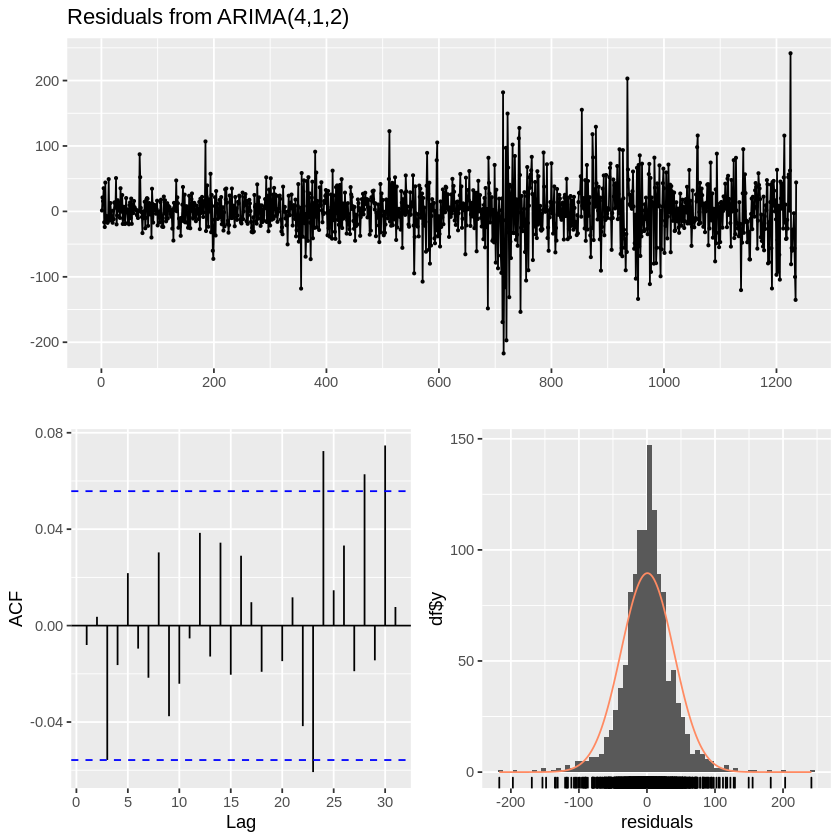

In [42]:
# Model analysis
checkresiduals(model)

In [43]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6723393,38.82798,27.07431,0.01833162,1.335909,0.9890194,-0.008044038


In [48]:
# Forecast for next day
fcast <- forecast(model, 1)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(4,1,2)

Model Information:
Series: prices$HDFC.NS.Adjusted 
ARIMA(4,1,2) 

Coefficients:
          ar1      ar2      ar3      ar4     ma1     ma2
      -1.4168  -0.9304  -0.1104  -0.1242  1.4602  0.9339
s.e.   0.0383   0.0583   0.0501   0.0306  0.0274  0.0336

sigma^2 = 1516:  log likelihood = -6267.13
AIC=12548.27   AICc=12548.36   BIC=12584.09

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.6723393 38.82798 27.07431 0.01833162 1.335909 0.9890194
                     ACF1
Training set -0.008044038

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236       2195.114 2145.212 2245.015 2118.796 2271.432


           HDFC.NS.Adjusted
2022-04-11           2424.7
2022-04-12           2425.7
2022-04-13           2378.5
2022-04-18           2263.5
2022-04-19           2140.2
2022-04-20           2180.2

[1] 1235

[1] 45.18338

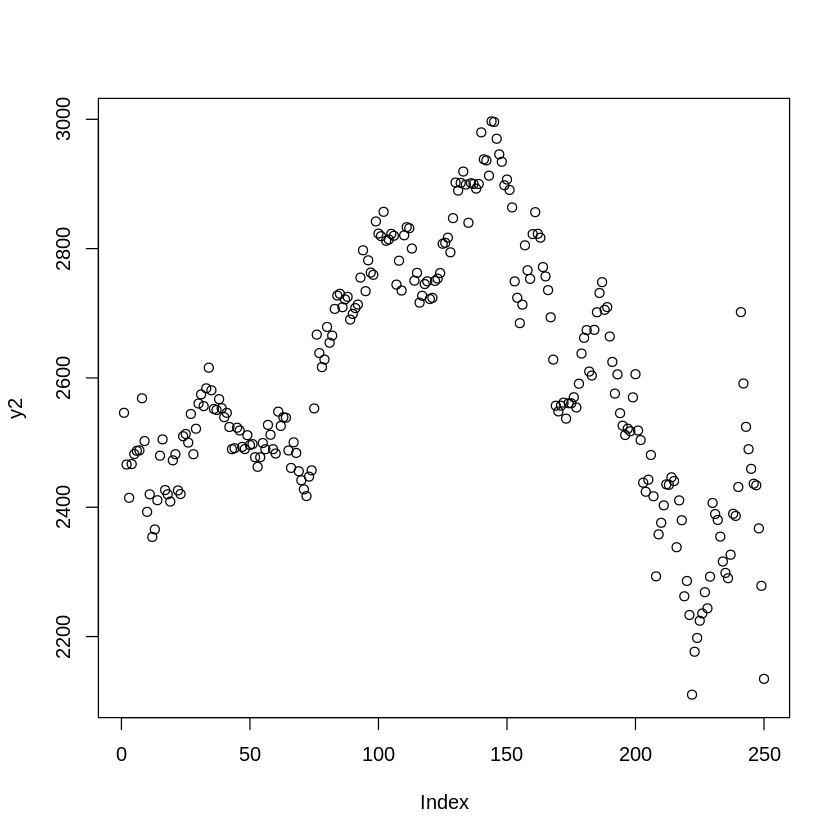

In [44]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 2201 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$HDFC.NS.Adjusted,250)) 


[1] 1234

[1] 0.0181265

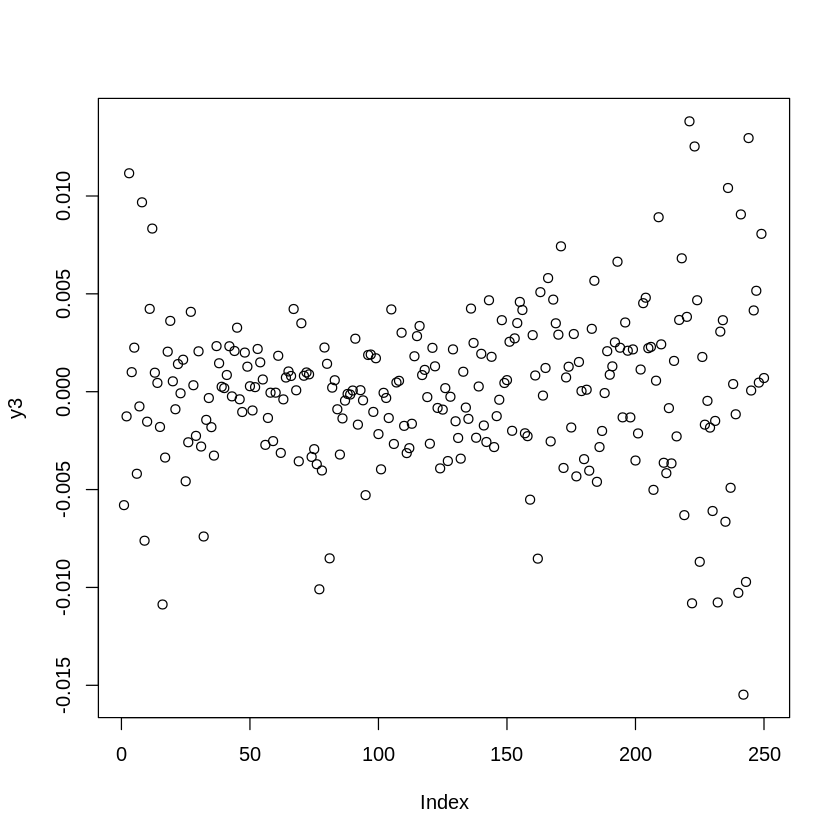

In [45]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$HDFC.NS.Adjusted,250)) 